# Experiment 7 - CoT

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Notebook variables

In [2]:
exp_number = 7

seeds = range(1,51)
n_episodes = 1
max_steps = 100
n_think_indices = [4,10]
models = ["0", "e1", "r4", "r10"]

levels = {"coin_collector": 14, "cooking": 9, "treasure_hunter": 27}

In [3]:
with open(f"./games/max_scores_simple.pickle", "rb") as f:
    max_scores_simple = pickle.load(f)
max_scores_simple = max_scores_simple[:len(seeds)]

with open(f"./games/max_scores_cooking.pickle", "rb") as f:
    max_scores_cooking = pickle.load(f)

# Game running

In [4]:
n_episodes = 1
max_steps = 100

In [ ]:
# 4/10
for n in [4,10]:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            if n == 4 and (game != "treasure_hunter" or level <= 17):
                continue # skip runs we've already done
            results_all_seeds = []
            for seed in range(11,21):
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n,
                                                    reads_own_reasoning=True,
                                                    random_selfeval=True,
                                                    prompt_version="CoT",
                                                    log=f"./Experiment {exp_number}/logs/{game}/r{n}think_level{level}-seed{seed}.log"
                                                    ),
                               f"games/{game}/level{level}-seed{seed}.z8",
                               max_steps=max_steps,
                               n_episodes=n_episodes)
                results_all_seeds.append(results[0])
            with open(f"./Experiment {exp_number}/r{n}think_{game}_level{level}_extended.pickle", "wb") as f:
                pickle.dump(results_all_seeds, f)
                print("Data pickled.")

games/treasure_hunter/level18-seed11.z8 .  	avg. steps:   3.0; avg. score:  1.0 / 1; total execution time: 1 s.
games/treasure_hunter/level18-seed12.z8 .  	avg. steps:  12.0; avg. score:  1.0 / 1; total execution time: 15 s.
games/treasure_hunter/level18-seed13.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 120 s.
games/treasure_hunter/level18-seed14.z8 .  	avg. steps:  17.0; avg. score:  1.0 / 1; total execution time: 33 s.
games/treasure_hunter/level18-seed15.z8 .  	avg. steps:  12.0; avg. score:  1.0 / 1; total execution time: 22 s.
games/treasure_hunter/level18-seed16.z8 .  	avg. steps:  14.0; avg. score:  1.0 / 1; total execution time: 22 s.
games/treasure_hunter/level18-seed17.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I'm stuck in a loop between the Kitchen and Studio. I've opened the hatch in the Kitchen, but I can't progress further. The game doesn't recognize my attempts to check the portal or gateway. I need to break the loop and find a different way to proceed. My next action should be to check the east gateway again, even though it's not working. 

**Next action:** check east gateway' was truncated to 'I'm stuck in a loop between the Kitchen and Studio. I've opened the hatch in the Kitchen, but I can't progress further. The game doesn't recognize my attempts to check the portal or gateway. I need '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 149 s.
games/treasure_hunter/level18-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 221 s.
games/treasure_hunter/level18-seed19.z8 .  	avg. steps:   3.0; avg. score:  1.0 / 1; total execution time: 1 s.
games/treasure_hunter/level18-seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 130 s.
Data pickled.
games/treasure_hunter/level19-seed11.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1; total execution time: 1 s.
games/treasure_hunter/level19-seed12.z8 .  	avg. steps:  22.0; avg. score:  1.0 / 1; total execution time: 40 s.
games/treasure_hunter/level19-seed13.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 112 s.
games/treasure_hunter/level19-seed14.z8 .  	avg. steps:  11.0; avg. score:  1.0 / 1; total execution time: 12 s.
games/treasure_hunter/level19-seed15.z8 

In [ ]:
# e1think

for game in levels.keys():
    
    for level in range(1, levels[game]+1):
        if (game != "treasure_hunter"):
            continue # skip runs we've already done
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=1,
                                              reads_own_reasoning=False,
                                              random_selfeval=False,
                                              prompt_version="CoT",
                                              log=f"./Experiment {exp_number}/logs/{game}/e1think_level{level}-seed{seed}.log"
                                              ),
                          f"games/{game}/level{level}-seed{seed}.z8",
                          max_steps=max_steps,
                          n_episodes=n_episodes)
            results_all_seeds.append(results[0])
        with open(f"./Experiment {exp_number}/e1think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f)
            print("Data pickled.")

### Debug plays

In [ ]:
play(LLMAgentSelfEvaluate(selfeval_turns=1,
                        reads_own_reasoning=False,
                        random_selfeval=False,
                        prompt_version="CoT",
                        verbose=True,
                        log=f"./Experiment {exp_number}/logs/treasure_hunter/e1think_level9-seed3.log"
                        ),
    f"games/treasure_hunter/level9-seed3.z8",
    max_steps=max_steps,
    n_episodes=n_episodes)

In [ ]:
while True:
    print("**************************************************************")
    play(LLMAgentSelfEvaluate(selfeval_turns=4,
                            reads_own_reasoning=True,
                            random_selfeval=True,
                            prompt_version="CoT",
                            verbose=True,
                            log=f"./Experiment {exp_number}/logs/coin_collector/r4think_level4-seed17.log"
                            ),
        f"games/coin_collector/level4-seed17.z8",
        max_steps=max_steps,
        n_episodes=n_episodes)

# Data aggregation for visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import bootstrap

In [5]:
final_arrays_scores = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}
final_arrays_times = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}

for n in models:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            try:
                
                with open(f"./Experiment {exp_number}/{n}think_{game}_level{level}.pickle", "rb") as f:
                    results_all_seeds = pickle.load(f)
                try:
                    with open(f"./Experiment {exp_number}/{n}think_{game}_level{level}_extended.pickle", "rb") as f:
                        results_all_seeds += pickle.load(f)
                except:
                    pass
            
                final_scores = [run[-1][1] for run in results_all_seeds] # score
                if game == "cooking":
                    final_scores = np.array(final_scores) / max_scores_cooking[level - 1]
                avg_final_score = np.mean(final_scores)
                bootstrap_score = bootstrap(data=(final_scores,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays_scores[game][n][0].append(avg_final_score)
                final_arrays_scores[game][n][1].append((bootstrap_score.confidence_interval.high, bootstrap_score.confidence_interval.low))

                final_times = [run[-1][2] for run in results_all_seeds] # time
                avg_final_time = np.mean(final_times)
                bootstrap_time = bootstrap(data=(final_times,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays_times[game][n][0].append(avg_final_time)
                final_arrays_times[game][n][1].append((bootstrap_time.confidence_interval.high, bootstrap_time.confidence_interval.low))

            except:
                pass

# Visualization

In [6]:
figsize=(15,25)

In [7]:
custom_palette = ['#c44e52', '#55a868', '#64b5cd', '#ccb974']
custom_linestyles = ["-", "-", "-.", "--"]

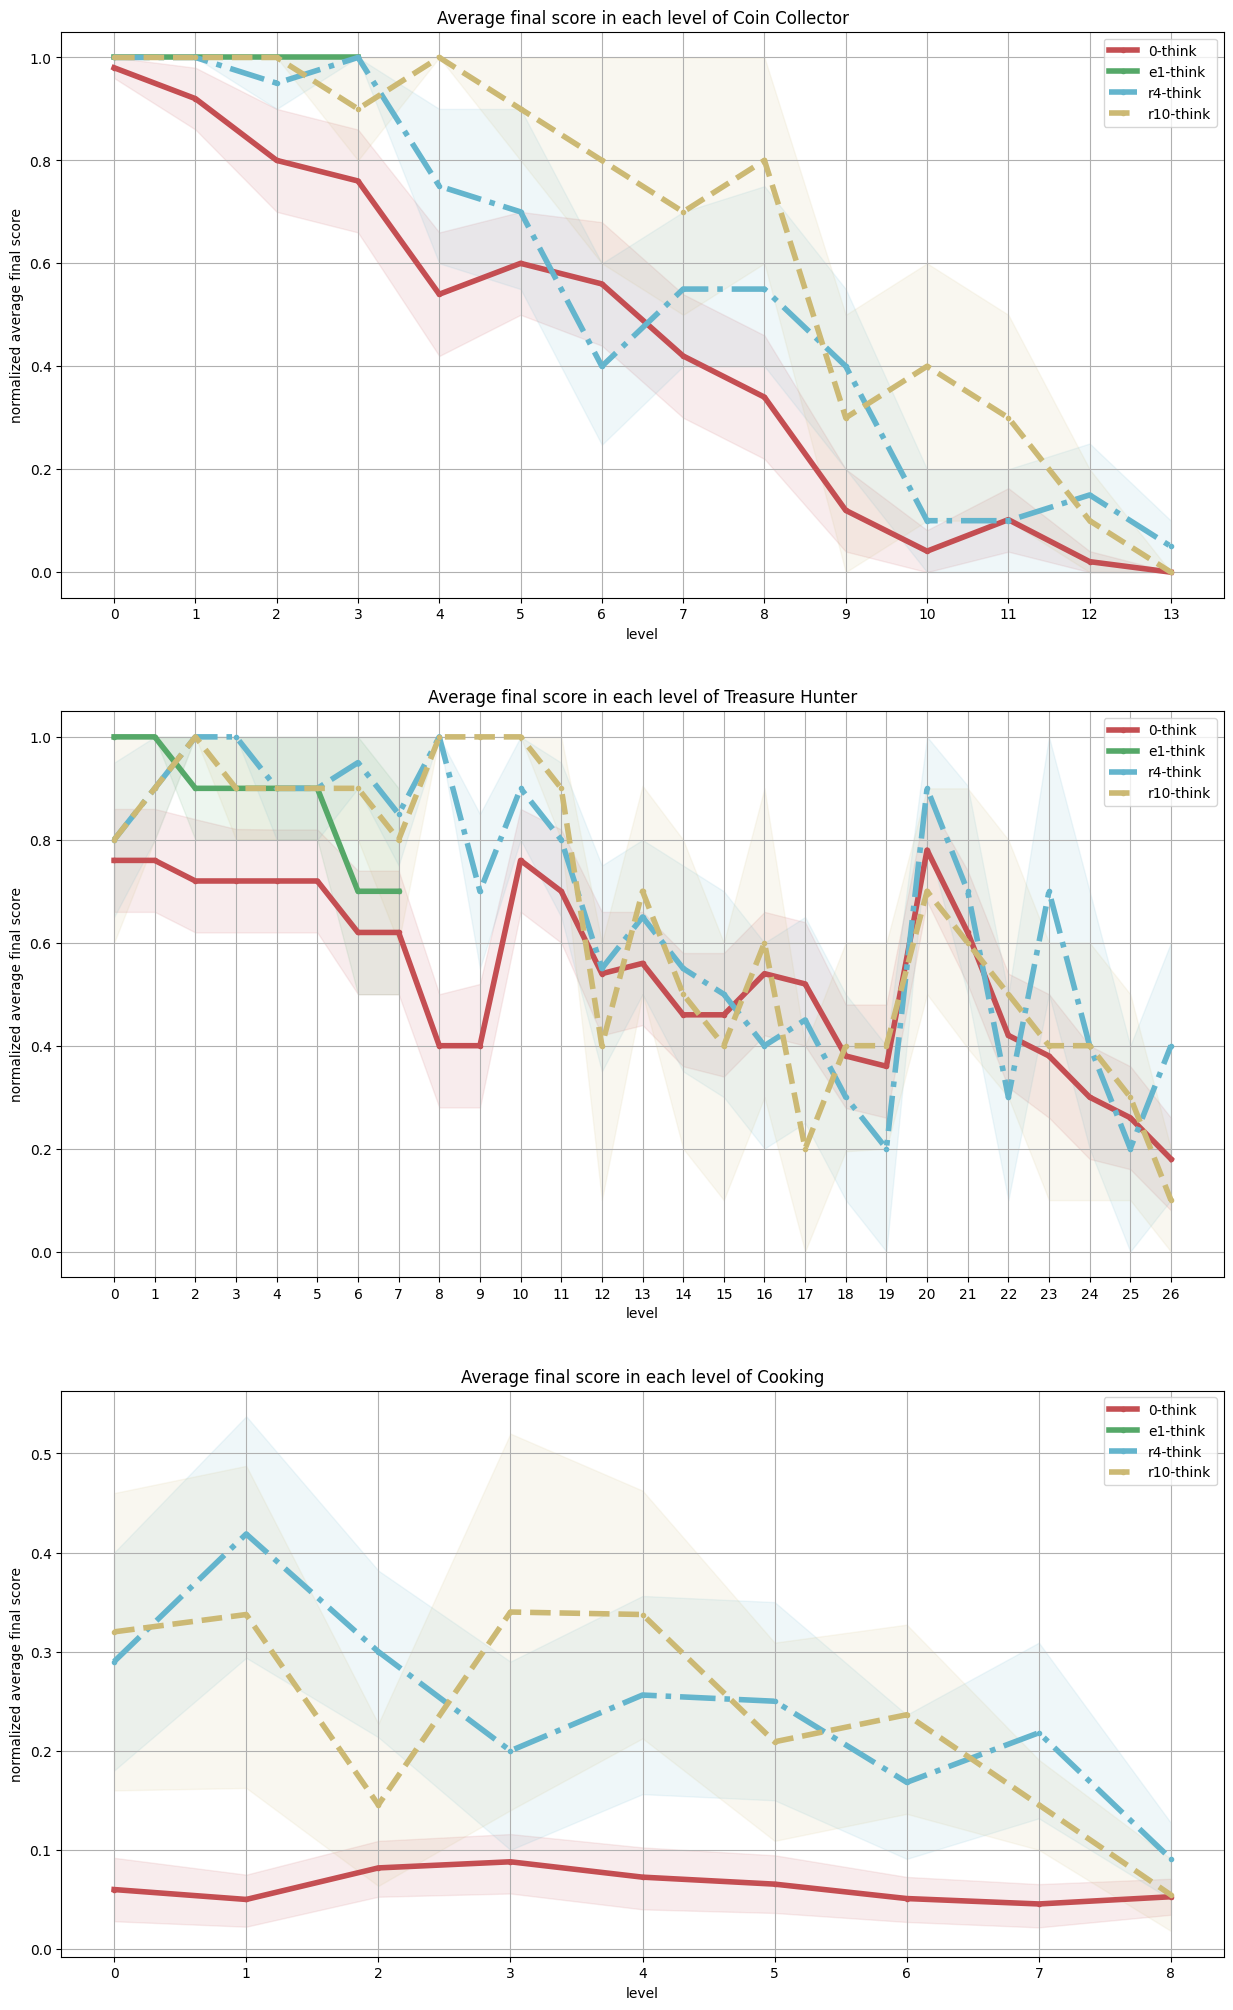

In [15]:
# %%%%% SCORE %%%%%

fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_scores.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_scores[game][model]
        x = list(range(len(y)))

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, 1),
                        np.clip([k[1] for k in y_ci], 0, 1),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=4, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('normalized average final score')
    ax.set_title(f"Average final score in each level of {prettified_names[game]}")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()

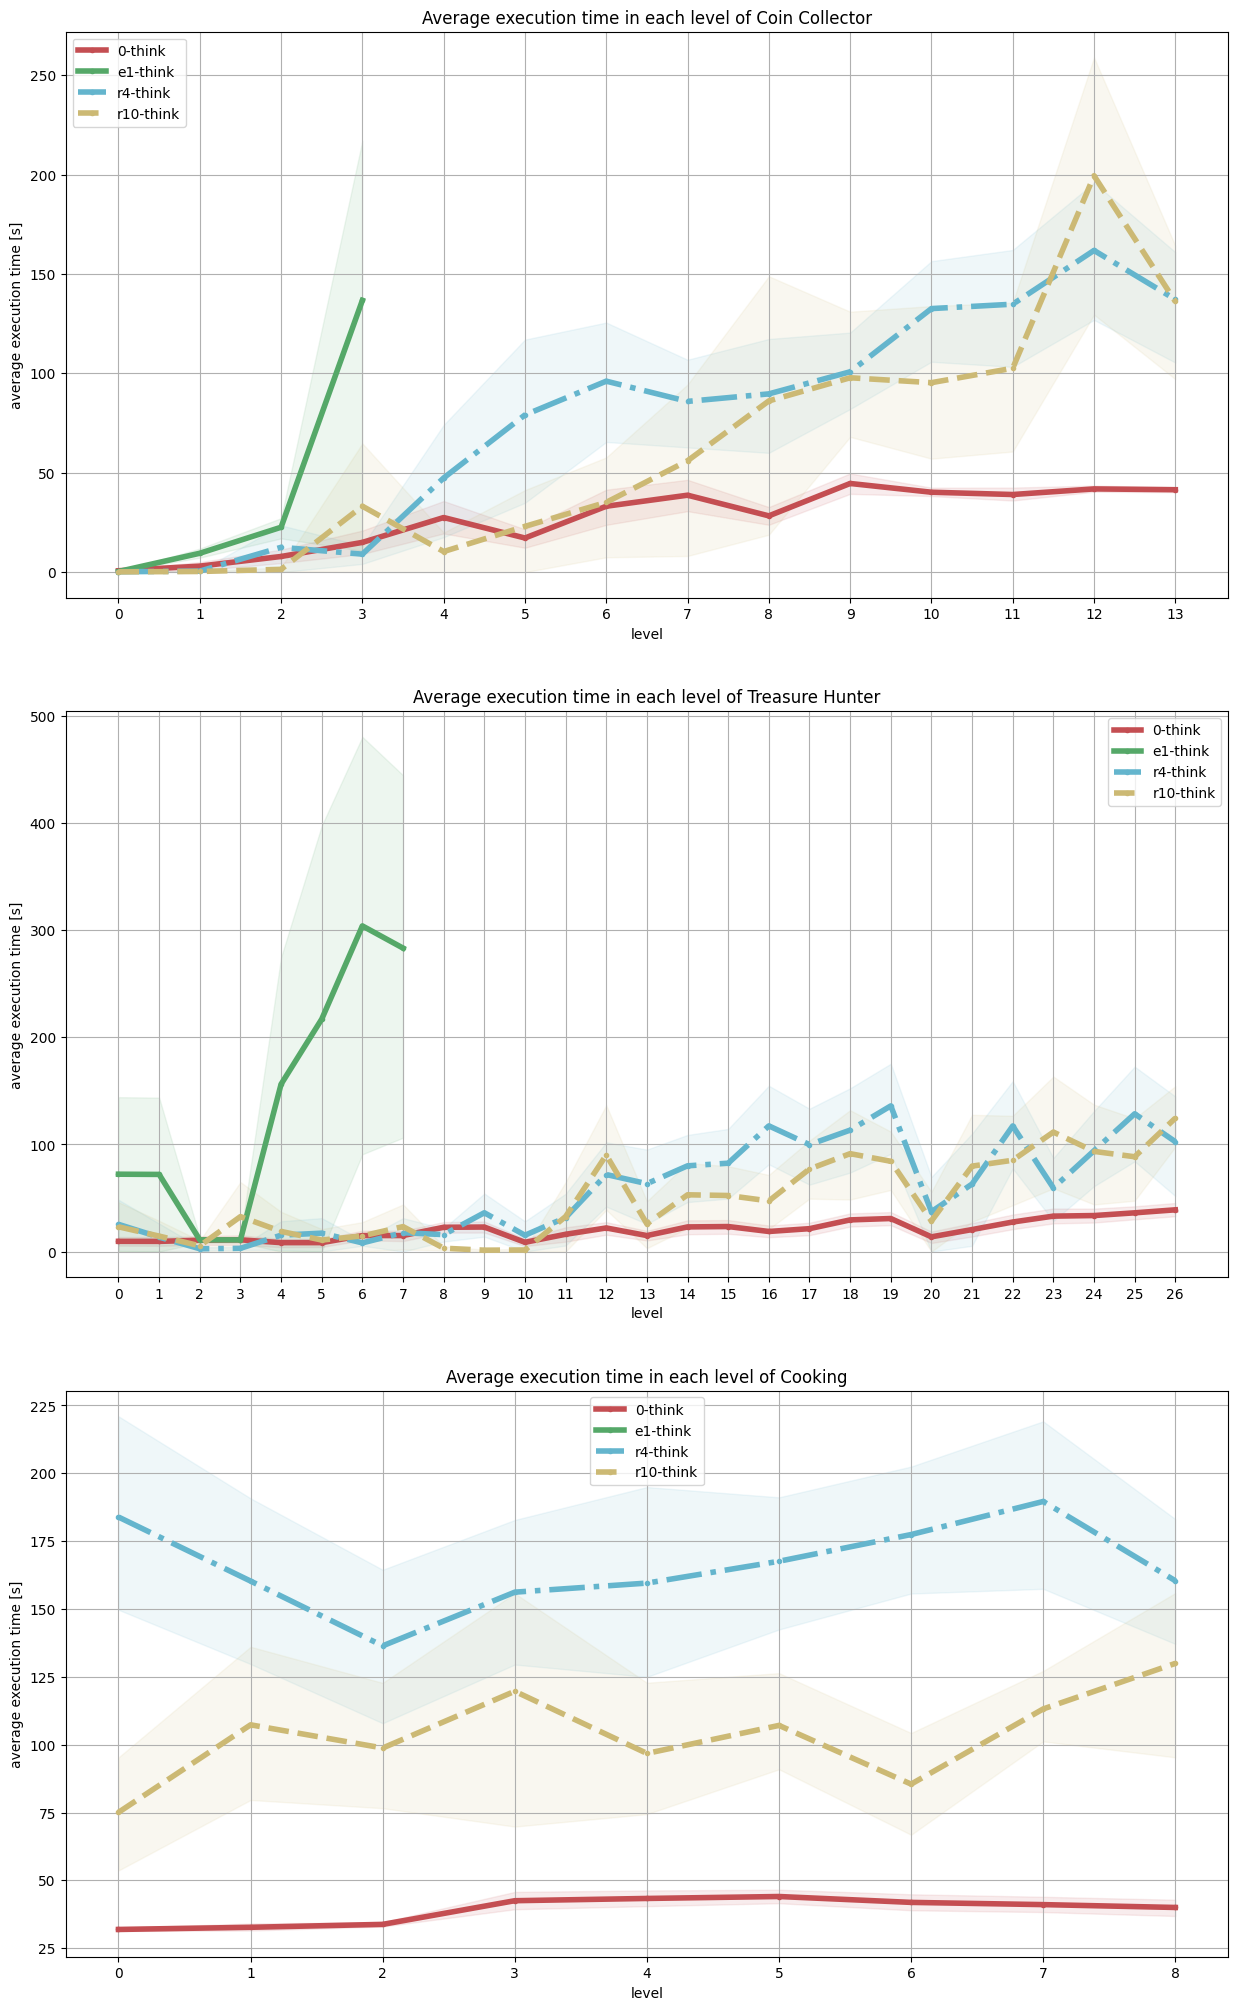

In [9]:
# %%%%% TIME %%%%%

fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_times.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_times[game][model]
        x = list(range(len(y)))

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, a_max=None),
                        np.clip([k[1] for k in y_ci], 0, a_max=None),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=4, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('average execution time [s]')
    ax.set_title(f"Average execution time in each level of {prettified_names[game]}")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()